In [1]:
#See how changing between amino acids effects RMSD as an average over all positions
import os
from Bio import SeqIO
import sys
sys.path.append('/mnt/ncshare/ozkilim/covid/covid_landscape/SARS2_RBD_Ab_escape_maps')
from bindingcalculator import BindingCalculator
from biopandas.pdb import PandasPdb
from scipy.spatial import distance_matrix
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib import cm
import matplotlib.patches as mpatches

In [2]:
def pos_matrix_creator(PDB_filename):
    """"This function takes in a PDB and ... it returns a symetrix MxM matrix that is rotation and shift independant"""""
    ppdb = PandasPdb()
    data = ppdb.read_pdb(PDB_filename)
    atom_data = ppdb.df['ATOM']    
    mut_removed = atom_data
    position_matrix = mut_removed[["residue_number","x_coord" , "y_coord" , "z_coord"]]
    # aggresgate and take mean of xyz values for each residue as an approximation.
    aggregation_functions = {'x_coord': 'mean', 'y_coord': 'mean', 'z_coord': 'mean'}
    position_matrix = position_matrix.groupby(position_matrix['residue_number']).aggregate(aggregation_functions)  

    return position_matrix 

Explore X Y and X positional deviation

426


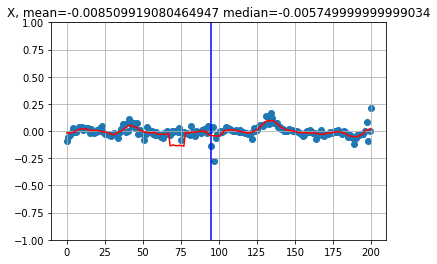

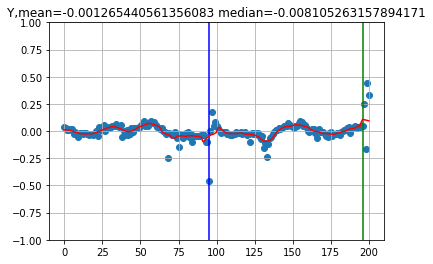

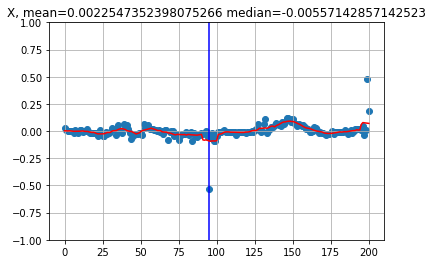

In [3]:
# Plot this as chain position... varies and mean variation in structure. ~40 mins to run.
# loop over all varientants and all pdbs
from scipy.signal import find_peaks

def movingaverage(interval, window_size):
    window= np.ones(int(window_size))/float(window_size)
    return np.convolve(interval, window, 'same')

base_var_list = ["alpha"] #match to how data is downloaded.

for dir in base_var_list:
    directory = "../structures/" + dir
    df2 = []
    for idx, filename in enumerate(os.listdir(directory)):
        file_path = os.path.join(directory, filename)
        mut_name = file_path[-9:-4]
        start = mut_name[0]
        target = mut_name[-1]
        pos = int(mut_name[1:-1])
        print(pos)
        # create distance matrix.
        d = pos_matrix_creator(file_path)
        pdb_file = "../wt_pdbs/rot-Alpha_RBD.pdb"
        wuhan_mat = pos_matrix_creator(pdb_file)
        dist = (wuhan_mat-d).to_numpy()

        plt.scatter(range(201),dist[:,0])
        y_av = movingaverage(dist[:,0], 10)
        plt.axvline(x = pos-331, color = 'b', label = 'Mutation Position')
        peaks, _ = find_peaks(y_av, height=0.1)
        for peak in peaks:
            plt.axvline(x = peak, color = 'g', label = 'Mutation Position')

        plt.title("X, mean="+str(np.mean(dist[:,0]))+" median="+str(np.median(dist[:,0])))
        plt.plot(y_av,c="r")
        plt.ylim([-1,1])
        plt.grid()
        plt.show()

        plt.title("Y,mean="+str(np.mean(dist[:,1]))+" median="+str(np.median(dist[:,1])))
        plt.scatter(range(201),dist[:,1])
        y_av = movingaverage(dist[:,1], 10)
        plt.axvline(x = pos-331, color = 'b', label = 'Mutation Position')
        peaks, _ = find_peaks(y_av, height=0.1)
        for peak in peaks:
            plt.axvline(x = peak, color = 'g', label = 'Mutation Position')
        plt.plot(y_av,c="r")
        plt.ylim([-1,1])
        plt.grid()
        plt.show()
        plt.title("X, mean="+str(np.mean(dist[:,2]))+" median="+str(np.median(dist[:,2])))
        plt.axvline(x = pos-331, color = 'b', label = 'Mutation Position')

        plt.scatter(range(201),dist[:,2])
        y_av = movingaverage(dist[:,2], 10)

        peaks, _ = find_peaks(y_av, height=0.1)
        for peak in peaks:
            plt.axvline(x = peak, color = 'g', label = 'Mutation Position')

        plt.plot(y_av,c="r")
        plt.grid()
        plt.ylim([-1,1])

        plt.show()
        break

Explore distance variation for each aa mutation.

426


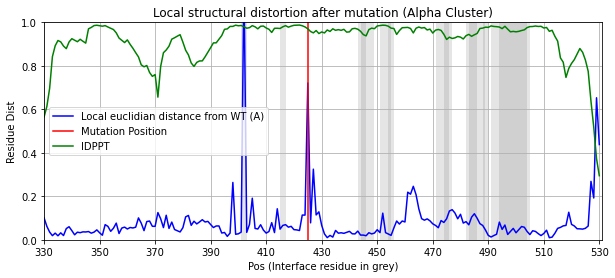

409


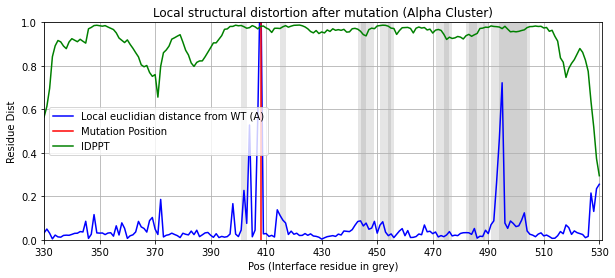

452


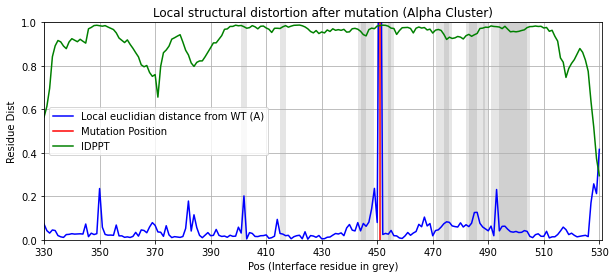

486


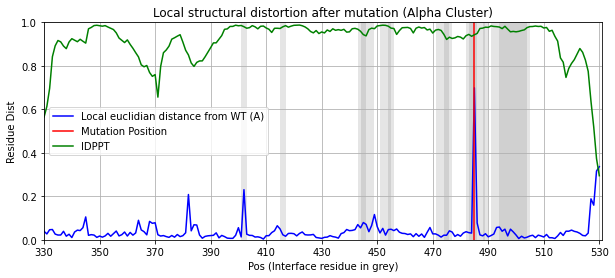

374


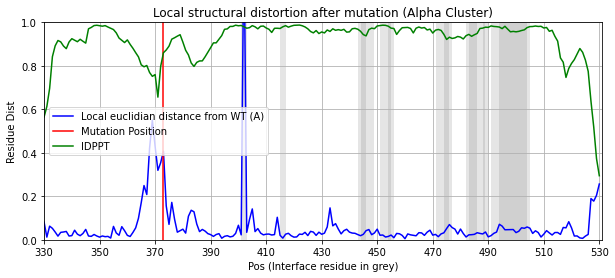

398


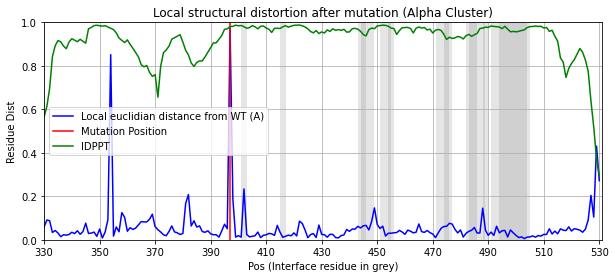

In [4]:
from scipy.signal import find_peaks
from scipy.spatial import distance_matrix

def movingaverage(interval, window_size):
    window= np.ones(int(window_size))/float(window_size)
    return np.convolve(interval, window, 'same')

interface = np.array([403,417,445,446,447,449,453,455,456,473,475,476,477,484,485,486,487,489,490,493,495,496,497,498,499,500,501,502,503,504,505])
df_bfactor = pd.read_csv("../disorder_analysis/alphatry.csv")

base_var_list = ["alpha"] #match to how data is downloaded.


for dir in base_var_list:
    directory = "../structures/" + dir
    df2 = []
    for idx, filename in enumerate(os.listdir(directory)):
        file_path = os.path.join(directory, filename)
        mut_name = file_path[-9:-4]
        start = mut_name[0]
        target = mut_name[-1]
        pos = int(mut_name[1:-1])
        print(pos)
        # create distance matrix.
        d = pos_matrix_creator(file_path)
        pdb_file = "../wt_pdbs/rot-Alpha_RBD.pdb"
        wuhan_mat = pos_matrix_creator(pdb_file)
        dist = (wuhan_mat.to_numpy()-d.to_numpy())

        dist = np.linalg.norm(dist,axis=1)
        fig = plt.figure(figsize=(10, 4))

        plt.plot(dist,c="b",label="Local euclidian distance from WT (A)")
        plt.axvline(x = pos-331, color = 'r', label = 'Mutation Position')

        peaks, _ = find_peaks(y_av, height=0.5)
        # for peak in peaks:
        #     plt.axvline(x = peak, color = 'g', label = 'Mutation Position')
        plt.ylabel("Residue Dist")
        # plot interface residues.. 
        for inter in interface:
            plt.bar(inter-331,1,color='grey',alpha=0.2,width=2)
        # then if bump is in interface so if it corrolates with phenotype  

        plt.title("Local structural distortion after mutation (Alpha Cluster)")
        plt.xlabel("Pos (Interface residue in grey)")
        plt.xticks(range(0,201,20),range(330,531,20)) #incorect labels..

        # plot parts of axes that are less confident... 
        plt.plot(range(201),df_bfactor["b_factor"]/100,alpha=1,color="green",label="lDPPT")

        plt.legend()
        plt.ylim([0,1])
        plt.xlim([0,201])
        plt.grid()

        plt.show()
        
        # fig.savefig("../reasults_figs/local_dist/disorder_" + str(idx) +"position.png",bbox_inches='tight',facecolor="white")
        if idx == 5:
            break

In [5]:
# Mut position vs local distortion positions matrix. 6min runtime.

from scipy.signal import find_peaks
from scipy.spatial import distance_matrix

def movingaverage(interval, window_size):
    window= np.ones(int(window_size))/float(window_size)
    return np.convolve(interval, window, 'same')

base_var_list = ["beta"] #match to how data is downloaded.

interaction_mat = []
for dir in base_var_list:
    directory = "../structures/" + dir
    df2 = []
    for idx, filename in enumerate(os.listdir(directory)):
        try:
            file_path = os.path.join(directory, filename)
            mut_name = file_path[-9:-4]
            start = mut_name[0]
            target = mut_name[-1]
            pos = int(mut_name[1:-1])
            print(idx)
            # create distance matrix.
            d = pos_matrix_creator(file_path)
            pdb_file = "../structures/beta/rot-Beta_RBD_331_531_A344C.pdb"
            wuhan_mat = pos_matrix_creator(pdb_file)
            dist = (wuhan_mat.to_numpy()-d.to_numpy())
            dist = np.linalg.norm(dist,axis=1)
            interaction_mat.append([pos,dist])
        except:
            pass
     
np.save("interaction_mat_beta2.npy",np.array(interaction_mat))

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

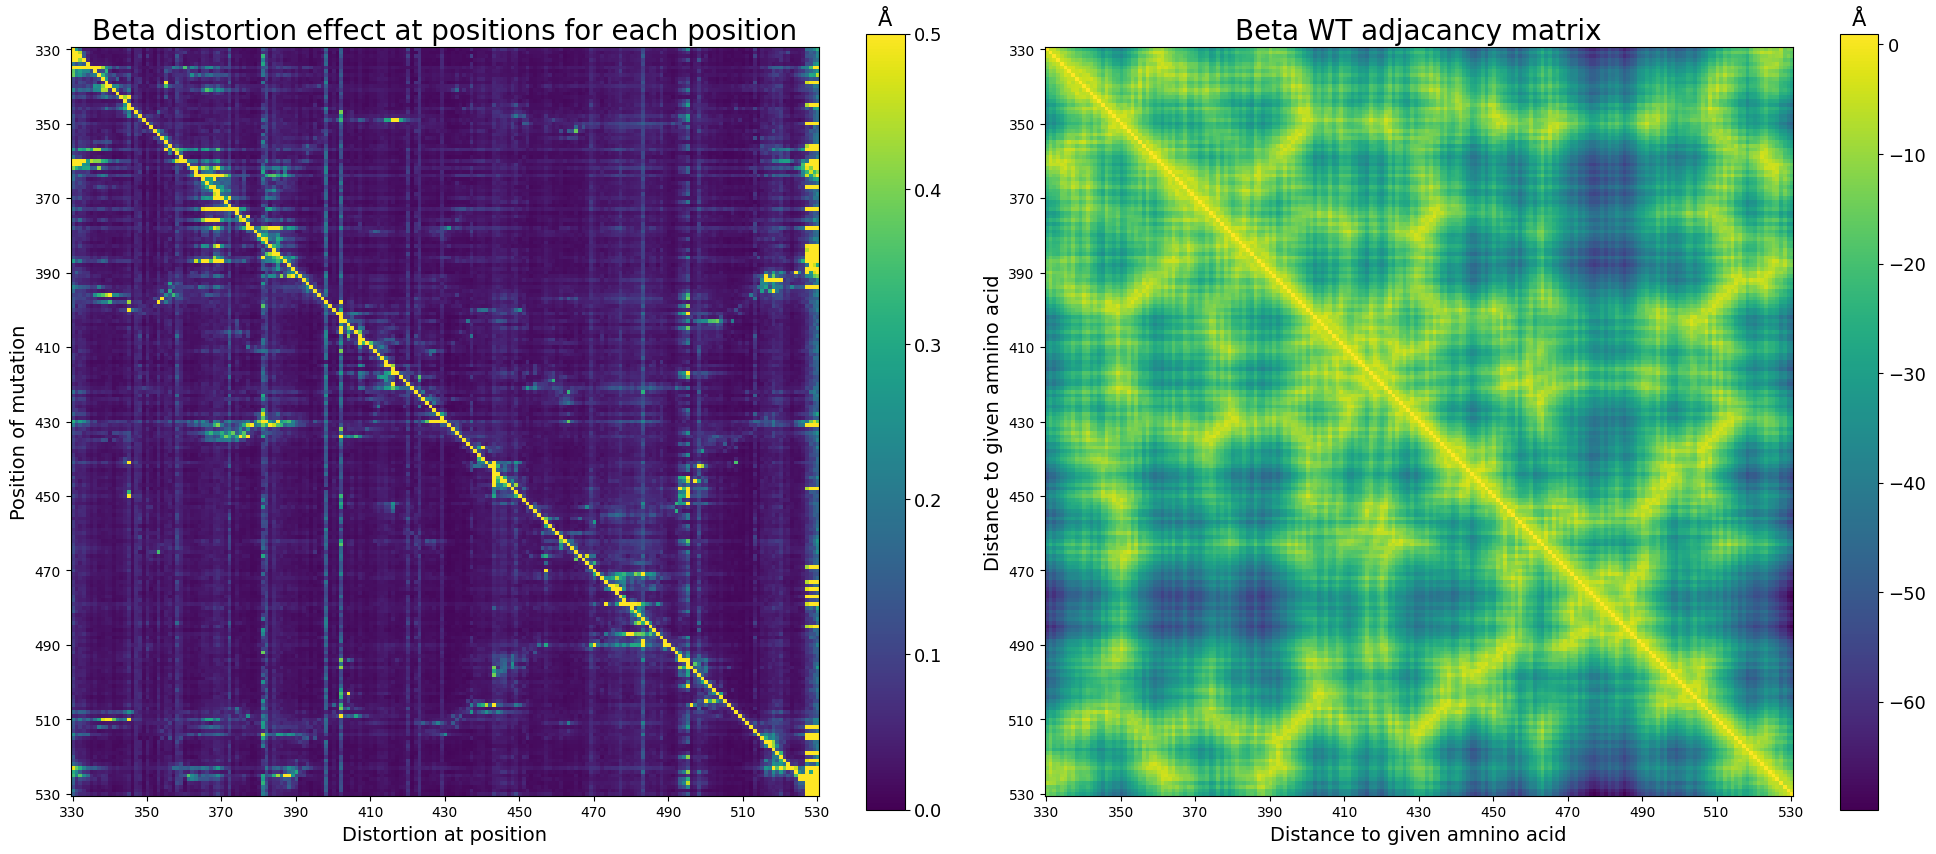

In [4]:
import seaborn as sn

#Plot positional local distortion reasults

interaction_mat = np.load("interaction_mat_beta.npy",allow_pickle=True)
df1 = pd.DataFrame(interaction_mat,columns =["pos","effect"])
df2 = pd.DataFrame(df1["effect"].to_list())
df1 = df1.groupby(['pos']).mean().unstack(fill_value=0) #did it mean values inside lists?... 
df1 = pd.DataFrame(df1["effect"].to_list())
df1 = df1.to_numpy()

f, axes = plt.subplots(1, 2,figsize=(20, 10), dpi=100)

colors = axes[0].imshow(df1,vmin=0, vmax=0.5)


axes[0].set_title('Beta distortion effect at positions for each position',fontsize=20)
axes[0].set_ylabel('Position of mutation',fontsize=14)
axes[0].set_xlabel('Distortion at position',fontsize=14)
clb = plt.colorbar(colors,ax=axes[0],shrink=0.80)
clb.ax.tick_params(labelsize=13) 
clb.ax.set_title('Å',fontsize=15)
axes[0].set_xticks(range(0,201,20),range(330,531,20)) #change labels..
axes[0].set_yticks(range(0,201,20),range(330,531,20)) #change labels..

#Plot adjacency matrix

af2_adg = np.load("../wuhan_generalization_experiments/embeddings/alpha_adj_mat_encoding.npy") #need to generate embeddings with wuhan generalization experement to visualise the representation.
af2_adg = af2_adg[0,:-2]
af2_adg = af2_adg.reshape((201, 201))

colors = axes[1].imshow(1-af2_adg)
axes[1].set_title('Beta WT adjacancy matrix',fontsize=20)
axes[1].set_ylabel('Distance to given amnino acid',fontsize=14)
axes[1].set_xlabel('Distance to given amnino acid',fontsize=14)

axes[1].set_xticks(range(0,201,20),range(330,531,20)) #change labels..
axes[1].set_yticks(range(0,201,20),range(330,531,20)) #change labels..

clb = plt.colorbar(colors,ax=axes[1],shrink=0.80)
clb.ax.tick_params(labelsize=13) 
clb.ax.set_title('Å',fontsize=15)

plt.tight_layout()
plt.show()
f.savefig("../reasults_figs/local_distortion_positions.png",bbox_inches='tight',facecolor="white")

# 371 373.. they are in omicron see if they change the interface...

([<matplotlib.axis.XTick at 0x7f5a452351c0>,
 [Text(0, 0, '330'),
  Text(20, 0, '350'),
  Text(40, 0, '370'),
  Text(60, 0, '390'),
  Text(80, 0, '410'),
  Text(100, 0, '430'),
  Text(120, 0, '450'),
  Text(140, 0, '470'),
  Text(160, 0, '490'),
  Text(180, 0, '510'),
  Text(200, 0, '530')])

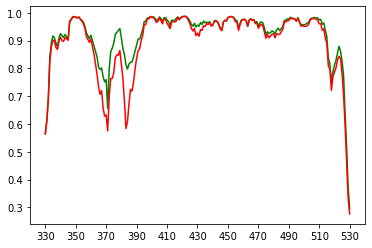

In [ ]:
#highlight positions that are far in seq space but close in 3d space in this same figure?...

# Plot bfactor for alpha and beta... 

df_bfactor = pd.read_csv("../disorder_analysis/alphatry.csv")
plt.plot(range(201),df_bfactor["b_factor"]/100,alpha=1,color="green",label="lDPPT")

df_bfactor = pd.read_csv("../disorder_analysis/betatry.csv")
plt.plot(range(201),df_bfactor["b_factor"]/100,alpha=1,color="red",label="lDPPT")
plt.xticks(range(0,201,20),range(330,531,20)) #incorect labels..


Check if "stripes" are caused by conformational flaxibility.

([<matplotlib.axis.XTick at 0x7f2fbf5bf190>,
 [Text(0, 0, '330'),
  Text(20, 0, '350'),
  Text(40, 0, '370'),
  Text(60, 0, '390'),
  Text(80, 0, '410'),
  Text(100, 0, '430'),
  Text(120, 0, '450'),
  Text(140, 0, '470'),
  Text(160, 0, '490'),
  Text(180, 0, '510'),
  Text(200, 0, '530')])

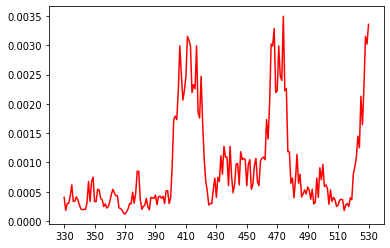

In [ ]:
df_bfactor = pd.read_csv("../disorder_analysis/alpha)uipredtry.csv")
plt.plot(range(201),df_bfactor["Iupred2"]/100,alpha=1,color="red",label="Iupred2")
plt.xticks(range(0,201,20),range(330,531,20)) #incorect labels..

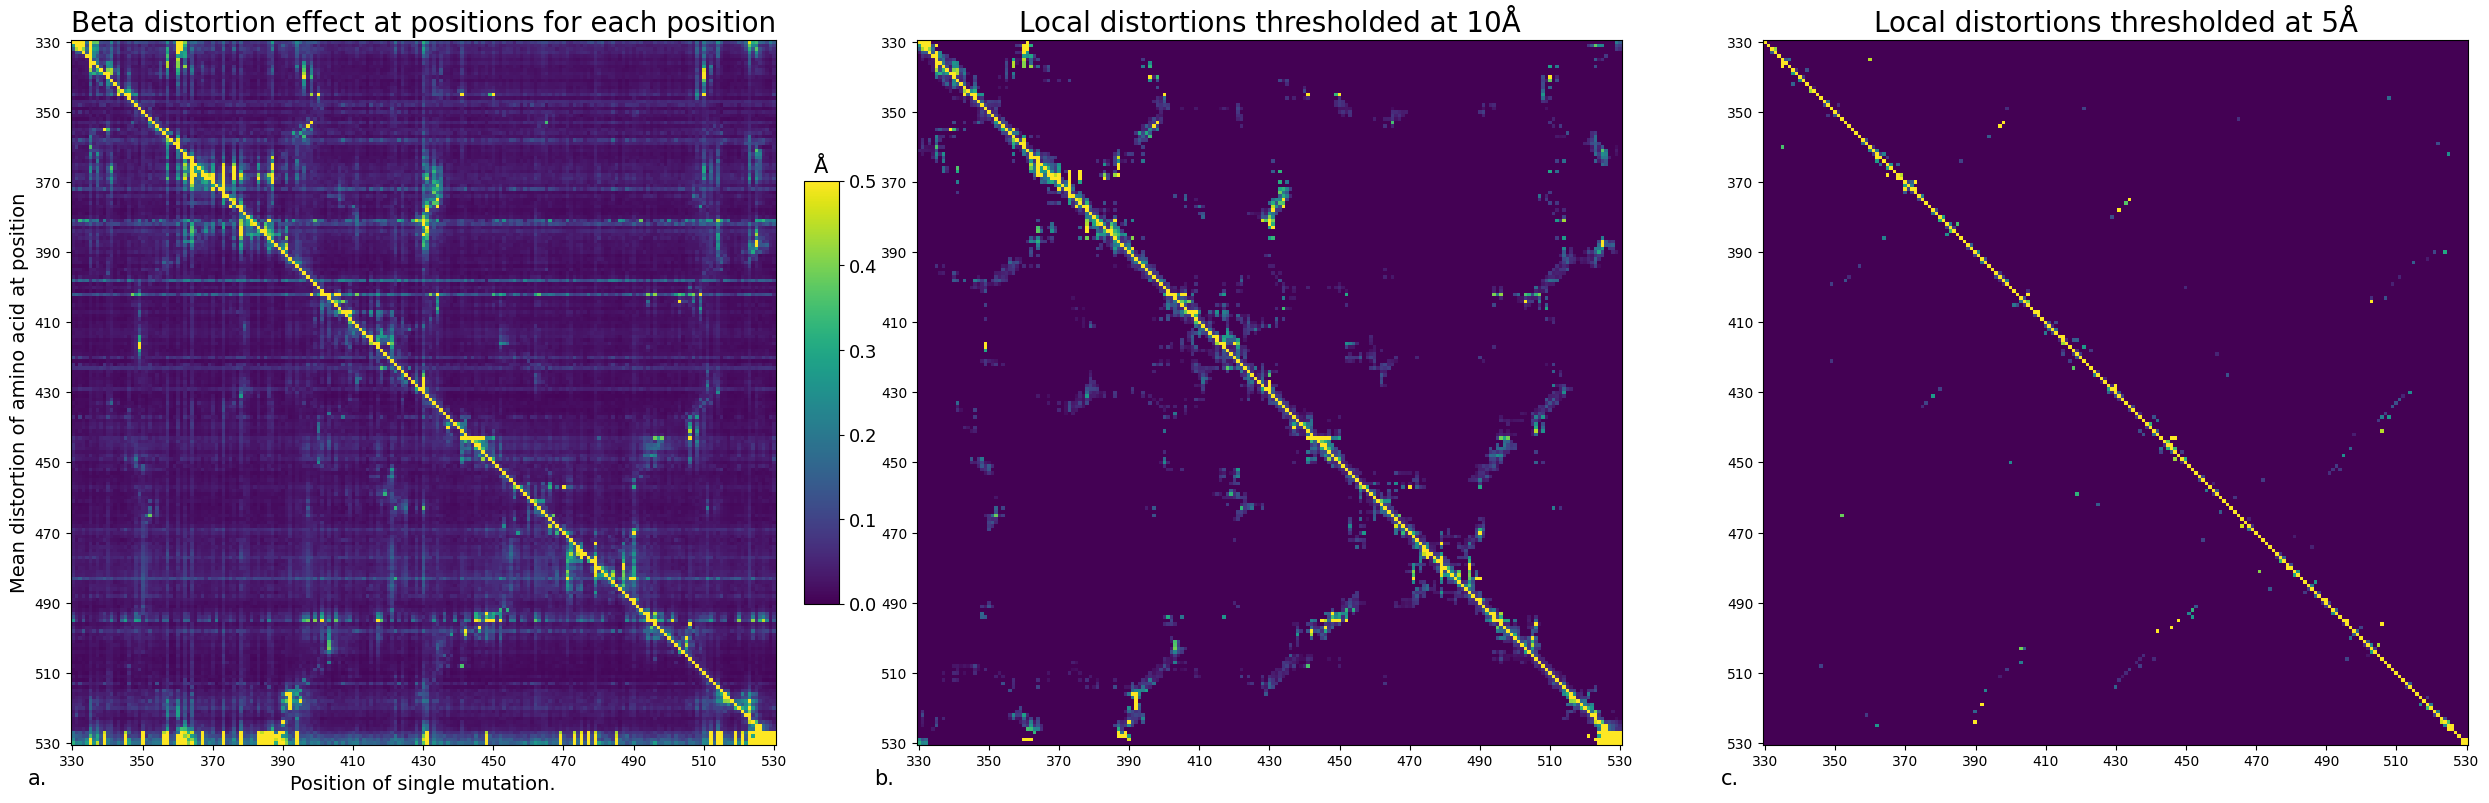

In [5]:
# plot to show local structural change is close in 3D space... 
from mpl_toolkits.axes_grid1.inset_locator import InsetPosition

f, axes = plt.subplots(1, 3,figsize=(25, 8), dpi=100)

colors = axes[0].imshow(df1.T,vmin=0, vmax=0.5)
axes[0].set_title('Beta distortion effect at positions for each position',fontsize=20)
axes[0].set_ylabel('Mean distortion of amino acid at position',fontsize=14)
axes[0].set_xlabel('Position of single mutation.',fontsize=14)
axes[0].set_xticks(range(0,201,20),range(330,531,20)) #change labels..
axes[0].set_yticks(range(0,201,20),range(330,531,20)) #change labels..
axes[0].text(-10, 210, 'a.', ha='center', va='center', color='black',fontsize=15)

#Plot adjacency matrix

af2_adg = np.load("../wuhan_generalization_experiments/embeddings/beta_adj_mat_encoding.npy") #need to generate embeddings with wuhan generalization experement to visualise the representation.
af2_adg = af2_adg[0,:-2]
af2_adg = af2_adg.reshape((201, 201))

af2_adg_thresh = (af2_adg<10)
colors = axes[1].imshow((df1*af2_adg_thresh).T,vmin=0, vmax=0.5)
axes[1].set_title('Local distortions thresholded at 10Å',fontsize=20)
# axes[1].set_ylabel('Distance to given amnino acid',fontsize=14)
# axes[1].set_xlabel('Distance to given amnino acid',fontsize=14)
axes[1].set_xticks(range(0,201,20),range(330,531,20)) #change labels..
axes[1].set_yticks(range(0,201,20),range(330,531,20)) #change labels..
axes[1].text(-10, 210, 'b.', ha='center', va='center', color='black',fontsize=15)


af2_adg_thresh = (af2_adg<5)
colors = axes[2].imshow((df1*af2_adg_thresh).T,vmin=0, vmax=0.5)
axes[2].set_title('Local distortions thresholded at 5Å',fontsize=20)
# axes[2].set_ylabel('Distance to given amnino acid',fontsize=14)
# axes[2].set_xlabel('Distance to given amnino acid',fontsize=14)

axes[2].set_xticks(range(0,201,20),range(330,531,20)) #change labels..
axes[2].set_yticks(range(0,201,20),range(330,531,20)) #change labels..


# cax,kw = plt.colorbar.make_axes([ax for ax in axes.flat])
# cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
# cbar_ax = fig.add_axes([0.88, 0.15, 0.04, 0.7])
# fig.subplots_adjust(right=0.85)
cax = axes[0].inset_axes([1.04, 0.2, 0.05, 0.6])
axes[2].text(-10, 210, 'c.', ha='center', va='center', color='black',fontsize=15)

clb = plt.colorbar(colors, ax=axes[0],shrink=5,cax=cax)

clb.ax.tick_params(labelsize=13) 
clb.ax.set_title('Å',fontsize=15)
plt.tight_layout()
plt.show()

f.savefig("../reasults_figs/distortion_thresholded.png",bbox_inches='tight',facecolor="white",dpi=500)

Draw the interface on the map. To further understand if we make mutations that are not on the interface can they effect the interface.

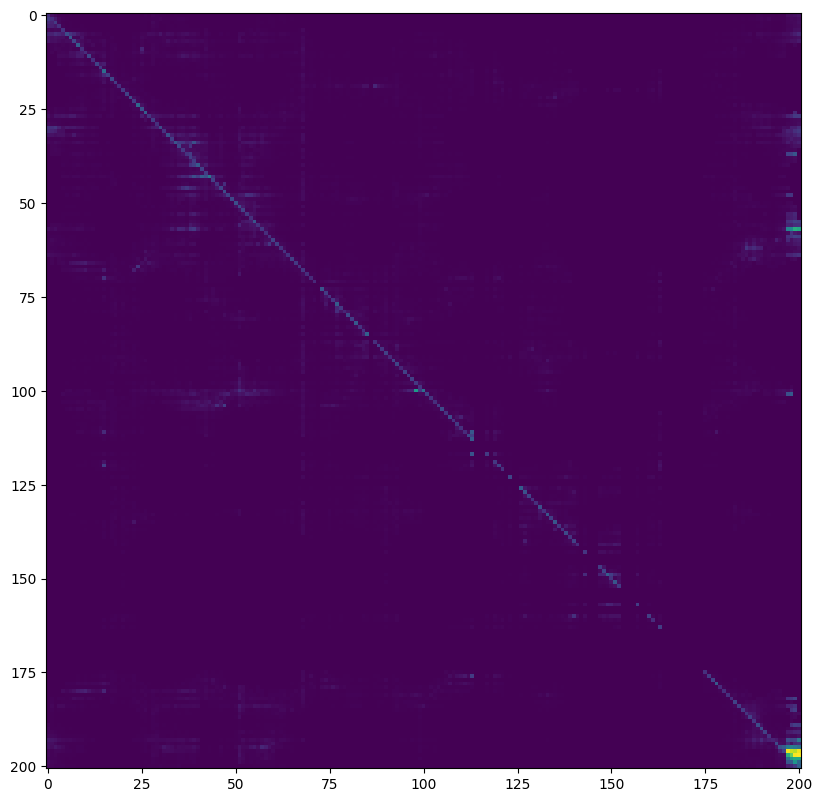

In [ ]:
interface = np.array([403,417,445,446,447,449,453,455,456,473,475,476,477,484,485,486,487,489,490,493,495,496,497,498,499,500,501,502,503,504,505])
interface = interface -331 #normalise for plotting.
empty = np.zeros((201,201))
f, axes = plt.subplots(1, 1,figsize=(10, 10), dpi=100)
empty[interface,:] = 1
empty[:,interface] = 1

af2_adg_thresh = (af2_adg<20)
plt.imshow((df1*af2_adg_thresh)*(1-empty).T)